2.3 Percentual da Base de Dados para Treinamento

In [22]:
import pandas as pd

# Carregar os dados
df = pd.read_csv("C:/Users/Samsung/ENG4040/planilha_unificada.csv", sep=";")

# Selecionar colunas numéricas para imputação
colunas_numericas = ['OBITOS', 'AREA_DESMATADA_KM2', 'FRP', 'RISCOFOGO',
                     'PRECIPITACAO', 'DIASEMCHUVA', 'pm2.5_atm']

# Converter colunas para numérico e preencher nulos com a média do ano
for col in colunas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df.groupby("ano")[col].transform(lambda x: x.fillna(x.mean()))

# Remover linhas com valores ainda ausentes
df = df.dropna(subset=colunas_numericas)

# Separar variáveis independentes e dependente
X = df[['AREA_DESMATADA_KM2', 'FRP', 'RISCOFOGO', 'PRECIPITACAO', 'DIASEMCHUVA', 'pm2.5_atm']]
y = df['OBITOS']

# Divisão temporal: treino com anos 2020–2022, teste com 2023
X_train = X[df['ano'] < 2023]
X_test = X[df['ano'] == 2023]
y_train = y[df['ano'] < 2023]
y_test = y[df['ano'] == 2023]

# Impressão dos tamanhos
print(f"Tamanho total da base: {len(df)}")
print(f"Amostras para treino (2020–2022): {len(X_train)} ({len(X_train)/len(df)*100:.2f}%)")
print(f"Amostras para teste (2023): {len(X_test)} ({len(X_test)/len(df)*100:.2f}%)")


Tamanho total da base: 1331
Amostras para treino (2020–2022): 979 (73.55%)
Amostras para teste (2023): 352 (26.45%)


Pré Processamento

In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Carregar os dados
df = pd.read_csv("C:/Users/Samsung/ENG4040/planilha_unificada.csv", sep=";")

# 2. Definir colunas numéricas para tratamento
colunas_numericas = [
    'OBITOS', 'AREA_DESMATADA_KM2', 'FRP',
    'RISCOFOGO', 'PRECIPITACAO', 'DIASEMCHUVA', 'pm2.5_atm'
]

# 3. Conversão e imputação pela média anual
for col in colunas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df.groupby("ano")[col].transform(lambda x: x.fillna(x.mean()))

# 4. Remoção de linhas com valores ausentes
df = df.dropna(subset=colunas_numericas)

# 5. Separar variáveis explicativas e alvo
X = df[['AREA_DESMATADA_KM2', 'FRP', 'RISCOFOGO',
        'PRECIPITACAO', 'DIASEMCHUVA', 'pm2.5_atm']]
y = df['OBITOS']

# 6. Separar treino (2020–2022) e teste (2023)
X_train = X[df['ano'] < 2023]
y_train = y[df['ano'] < 2023]
X_test = X[df['ano'] == 2023]
y_test = y[df['ano'] == 2023]

# 7. Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



5.1 Desempenho dos Algoritmos

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np

# Dicionário com os modelos
modelos = {
    "Regressão Linear": LinearRegression(),
    "Árvore de Regressão": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Avaliação dos modelos
resultados = []

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Corrigido aqui
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    resultados.append({
        "Modelo": nome,
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2
    })

# Exibir resultados
df_resultados = pd.DataFrame(resultados)
print(df_resultados)


                Modelo      RMSE       MAE        R²
0     Regressão Linear  6.514743  4.324418 -0.122449
1  Árvore de Regressão  6.779919  4.103707 -0.215685
2        Random Forest  6.614188  3.923905 -0.156978
3              XGBoost  6.827193  4.331465 -0.232697


 5.2 Análise das Variáveis

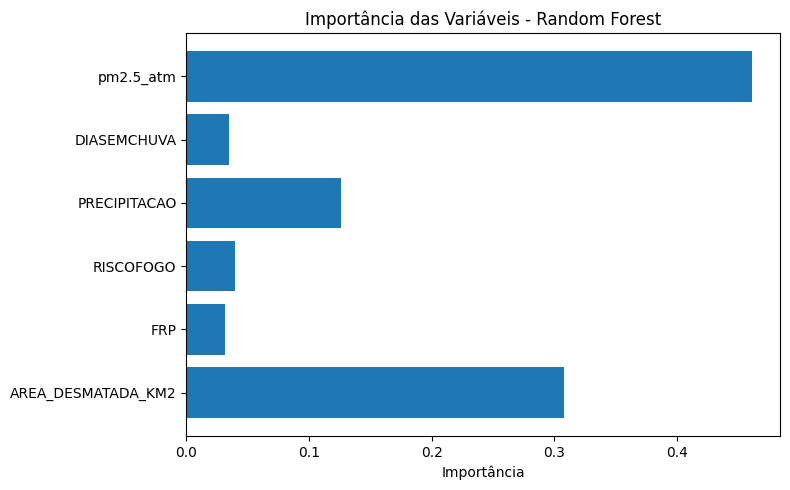

In [33]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Treinar modelo Random Forest com os dados escalados
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train, y_train)  # Corrigido: usar X_train

# Obter importâncias das variáveis
importancias = modelo_rf.feature_importances_
variaveis = X.columns  # Nomes das variáveis originais

# Visualização
plt.figure(figsize=(8, 5))
plt.barh(variaveis, importancias)
plt.xlabel("Importância")
plt.title("Importância das Variáveis - Random Forest")
plt.tight_layout()
plt.show()


 5.9 Visualização dos Resultado

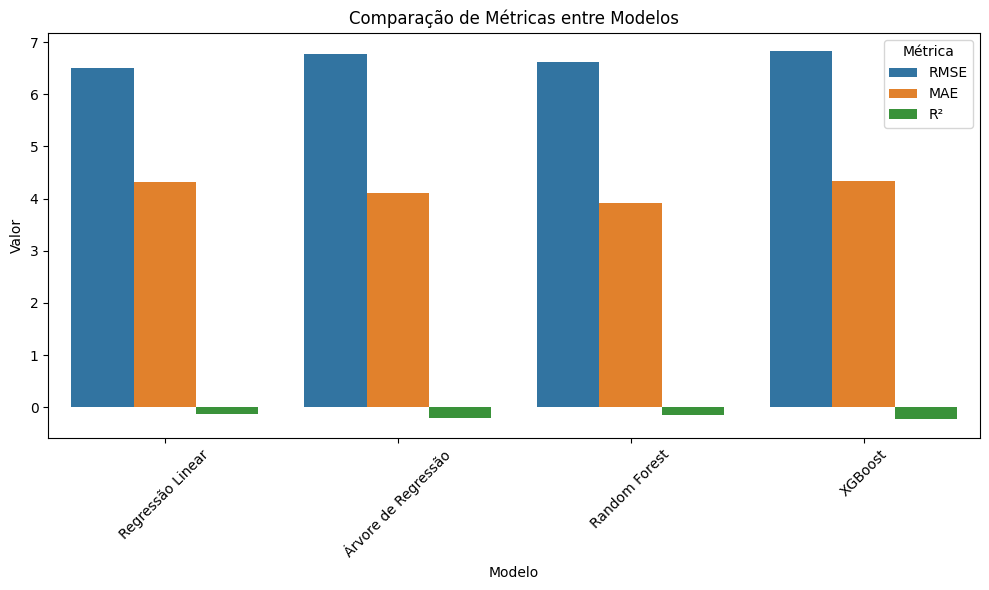

In [34]:
import seaborn as sns

# Comparação dos modelos com gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=df_resultados.melt(id_vars="Modelo"), x="Modelo", y="value", hue="variable")
plt.title("Comparação de Métricas entre Modelos")
plt.ylabel("Valor")
plt.xlabel("Modelo")
plt.legend(title="Métrica")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


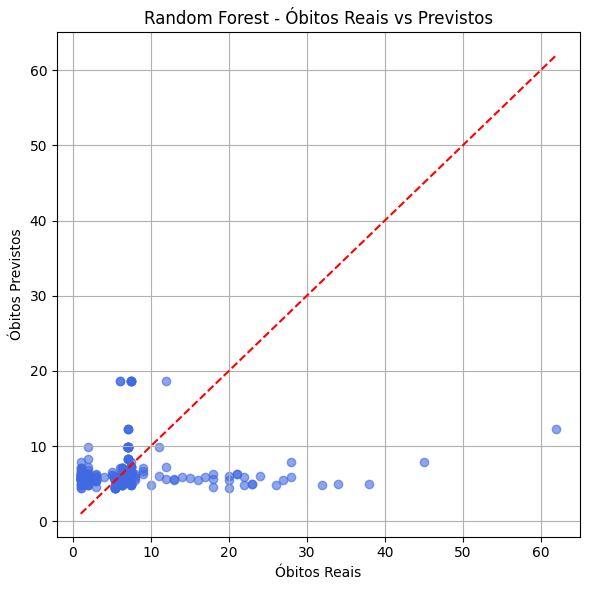

In [27]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Treinar modelo com os dados
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

# Plot real vs previsto
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Linha ideal
plt.xlabel('Óbitos Reais')
plt.ylabel('Óbitos Previstos')
plt.title('Random Forest - Óbitos Reais vs Previstos')
plt.grid(True)
plt.tight_layout()
plt.show()
